In [57]:
import pandas as pd
import numpy as np

In [58]:
data = pd.read_csv('dataset/recipe_dataset.csv')
data = data.head(1000)
data = data.drop(data.columns[0], axis=1)
data

,recipe_id,recipe_name,url,recipe_Ingredients,Instructions,cuisine,Prep Time in Minutes
0,1,Super Easy Slow Cooker Chicken Enchilada Meat,https://www.allrecipes.com/recipe/228367/super...,"2 cups chicken broth, 1 (14.5 ounce) can diced...","Place chicken broth, tomatoes, flour, chili po...",['Mexican Inspired'],480
1,2,Avocado Quick Bread,https://www.allrecipes.com/recipe/27341/avocad...,"2.6666667461395 cups all-purpose flour, 1.5 te...",Preheat the oven to 350 degrees F (175 degrees...,['American'],60
2,3,Quick and Easy Baked Fish Fillet,https://www.allrecipes.com/recipe/256348/quick...,"1 pound flounder fillets, 0.5 teaspoon salt, g...",Gather all ingredients. Preheat the oven to 40...,['American'],25
3,4,Roasted Kohlrabi,https://www.allrecipes.com/recipe/203975/roast...,"4 kohlrabi bulbs, peeled, 1 tablespoon olive o...",Preheat the oven to 450 degrees F (230 degrees...,['American'],20
4,5,Custard Buttercream,https://www.allrecipes.com/recipe/262379/custa...,"1 egg, 1 cup white sugar, 0.5 cup milk, 1.3333...","Beat egg with a fork in a small, heavy saucepa...",['German'],10
...,...,...,...,...,...,...,...
995,996,Hawaiian Ham and Cheese Sliders,https://www.allrecipes.com/recipe/237358/hawai...,"cooking spray (such as Crisco®), 0.5 cup butte...",Gather all ingredients. Preheat the oven to 35...,['Hawaiian'],35
996,997,Grilled Prosciutto-Wrapped Peaches with Burrat...,https://www.allrecipes.com/recipe/244601/grill...,"2 ripe, sweet (but not soft) freestone peaches...",Preheat an outdoor grill at medium-high heat a...,"['Italian Inspired', 'American', 'Italian', 'F...",7
997,998,Slow Cooker Creamed Corn,https://www.allrecipes.com/recipe/25894/slow-c...,"1.25 (16 ounce) packages frozen corn kernels, ...","Gather all ingredients. Combine corn, cream ch...",['American'],120
998,999,Sheet Pan Salmon and Veggies,https://www.allrecipes.com/sheet-pan-salmon-an...,"3 bell peppers, assorted colors, cut into 1-in...",Preheat the oven to 425 degrees F (220 degrees...,['American'],20


In [46]:
# Step 1: Create a list of all ingredients
from collections import Counter
ingredient_list = []
for ingredients in data['recipe_Ingredients']:
    ingredient_list.extend(ingredients.split(','))

# Step 2: Clean up the ingredient strings by stripping whitespace
ingredient_list = [ingredient.strip() for ingredient in ingredient_list]

# Step 3: Count the occurrences of each ingredient
ingredient_counts = Counter(ingredient_list)

# Step 4: Convert the counts to a new DataFrame
df_ingredient_counts = pd.DataFrame(list(ingredient_counts.items()), columns=['Ingredient', 'Count'])

# Display the new DataFrame
df_ingredient_counts

,Ingredient,Count
0,2 cups chicken broth,7
1,1 (14.5 ounce) can diced tomatoes,8
2,0.5 cup all-purpose flour,21
3,0.33333334326744 cup chili powder,1
4,2 teaspoons ground cumin,6
...,...,...
5317,2 to 3 summer squash,1
5318,1 teaspoon Catanzaro herbs,1
5319,3 teaspoons vanilla sugar,1
5320,6 large apples - peeled,1


In [47]:
df_ingredient_counts['Ingredient'].duplicated().any()

False

In [48]:
#give me sum of count of each ingredient
total_count = df_ingredient_counts['Count'].sum()
total_count

12473

In [49]:
#add a new column to the DataFrame that contains the proportion of each ingredient
df_ingredient_counts['Proportion'] = df_ingredient_counts['Count'] / total_count
df_ingredient_counts

,Ingredient,Count,Proportion
0,2 cups chicken broth,7,0.000561
1,1 (14.5 ounce) can diced tomatoes,8,0.000641
2,0.5 cup all-purpose flour,21,0.001684
3,0.33333334326744 cup chili powder,1,0.000080
4,2 teaspoons ground cumin,6,0.000481
...,...,...,...
5317,2 to 3 summer squash,1,0.000080
5318,1 teaspoon Catanzaro herbs,1,0.000080
5319,3 teaspoons vanilla sugar,1,0.000080
5320,6 large apples - peeled,1,0.000080


In [50]:
# Assuming df_ingredient_counts is the DataFrame
ingredient_to_search = '2 cups chicken broth'

# Filter the DataFrame and get the count
count = df_ingredient_counts.loc[df_ingredient_counts['Ingredient'] == ingredient_to_search, 'Count'].values

# Output the count, or a message if the ingredient is not found
if len(count) > 0:
    print(f"The count for '{ingredient_to_search}' is: {count[0]}")
else:
    print(f"'{ingredient_to_search}' not found in the DataFrame.")


The count for '2 cups chicken broth' is: 7


In [51]:
cuisine_initial = data
df_cuisine_ini = cuisine_initial[['recipe_name','recipe_Ingredients']]
df_cuisine_ini

,recipe_name,recipe_Ingredients
0,Super Easy Slow Cooker Chicken Enchilada Meat,"2 cups chicken broth, 1 (14.5 ounce) can diced..."
1,Avocado Quick Bread,"2.6666667461395 cups all-purpose flour, 1.5 te..."
2,Quick and Easy Baked Fish Fillet,"1 pound flounder fillets, 0.5 teaspoon salt, g..."
3,Roasted Kohlrabi,"4 kohlrabi bulbs, peeled, 1 tablespoon olive o..."
4,Custard Buttercream,"1 egg, 1 cup white sugar, 0.5 cup milk, 1.3333..."
...,...,...
995,Hawaiian Ham and Cheese Sliders,"cooking spray (such as Crisco®), 0.5 cup butte..."
996,Grilled Prosciutto-Wrapped Peaches with Burrat...,"2 ripe, sweet (but not soft) freestone peaches..."
997,Slow Cooker Creamed Corn,"1.25 (16 ounce) packages frozen corn kernels, ..."
998,Sheet Pan Salmon and Veggies,"3 bell peppers, assorted colors, cut into 1-in..."


In [52]:
import numpy as np
import pandas as pd
from collections import Counter

probabilities = df_ingredient_counts['Proportion'].tolist()
ingredients = df_ingredient_counts['Ingredient'].tolist()
print(probabilities)

size_controlled_ingre_freq_controlled_df = []

for i in range(10):
    # Step 2: Create size-controlled randomized versions of each recipe
    size_controlled_recipes = {'recipe_id': [], 'ingredients': []}

    for i in range(len(df_cuisine_ini)):
        # Step 2.1: Get the size of the current recipe
        recipe_size = len(df_cuisine_ini['recipe_Ingredients'][i].split(','))

        # Step 2.2: Sample ingredients from the ingredients basket proportional to their frequency
        sampled_ingredients = np.random.choice(ingredients, size=recipe_size, p=probabilities, replace=False).tolist()

        # Step 2.3: Add the randomized recipe to the new dataset
        size_controlled_recipes['recipe_id'].append(f"R{i + 1}")
        size_controlled_recipes['ingredients'].append(sampled_ingredients)

    # Convert the result into a DataFrame
    size_controlled_recipes_df = pd.DataFrame(size_controlled_recipes)
    size_controlled_ingre_freq_controlled_df.append(size_controlled_recipes_df)

# Display the first few rows of the size-controlled randomized recipes
# print(size_controlled_recipes_df.head())


[0.0005612122183917261, 0.000641385392447687, 0.0016836366551751783, 8.017317405596088e-05, 0.00048103904433576526, 0.0036077928325182395, 8.017317405596088e-05, 0.008498356449931853, 0.013629439589513348, 0.0016034634811192174, 0.006894892968812636, 0.0008017317405596087, 0.0016836366551751783, 0.00016034634811192176, 0.0005612122183917261, 0.002004329351399022, 0.0008017317405596087, 0.00024051952216788263, 8.017317405596088e-05, 0.004409524573077848, 0.007616451535316283, 8.017317405596088e-05, 0.0016836366551751783, 8.017317405596088e-05, 0.00016034634811192176, 0.00016034634811192176, 0.0003206926962238435, 0.00024051952216788263, 8.017317405596088e-05, 0.00729575883909244, 0.0016836366551751783, 0.001282770784895374, 0.00016034634811192176, 8.017317405596088e-05, 8.017317405596088e-05, 0.001362943958951335, 0.0050509099655255355, 0.012667361500841818, 0.0046500440952457305, 0.00024051952216788263, 0.004810390443357652, 0.00456987092118977, 0.0017638098292311393, 8.017317405596088

In [53]:
len(size_controlled_ingre_freq_controlled_df)

10

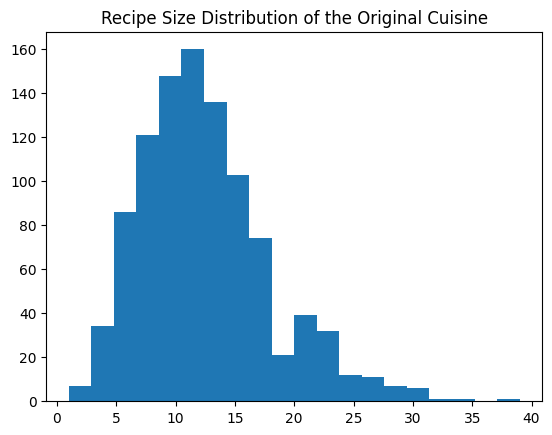

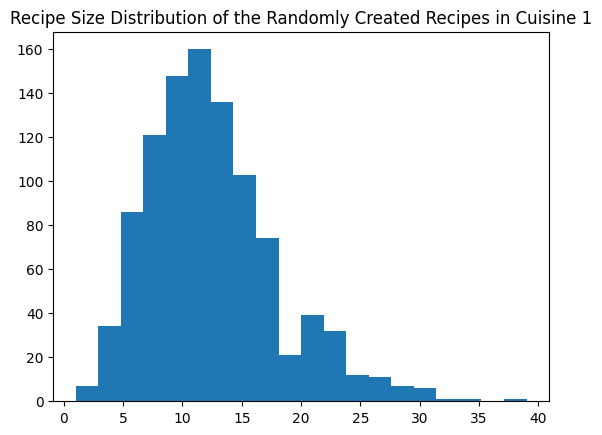

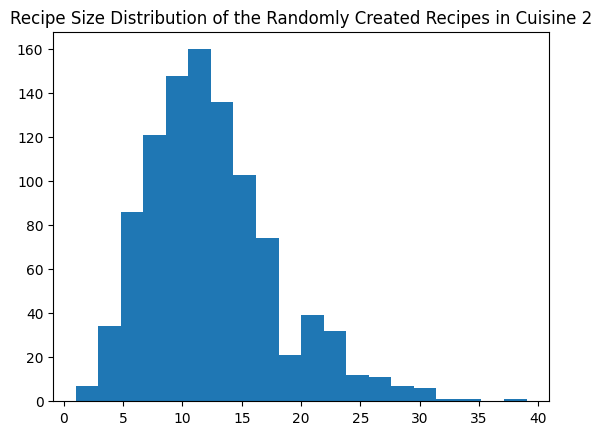

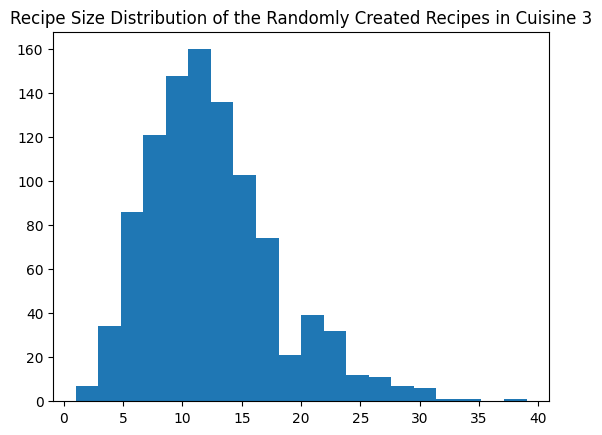

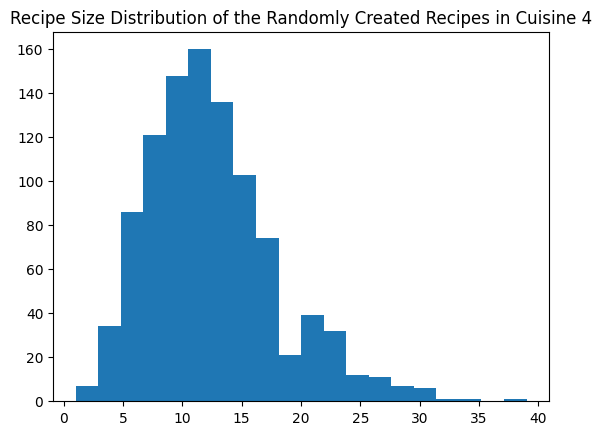

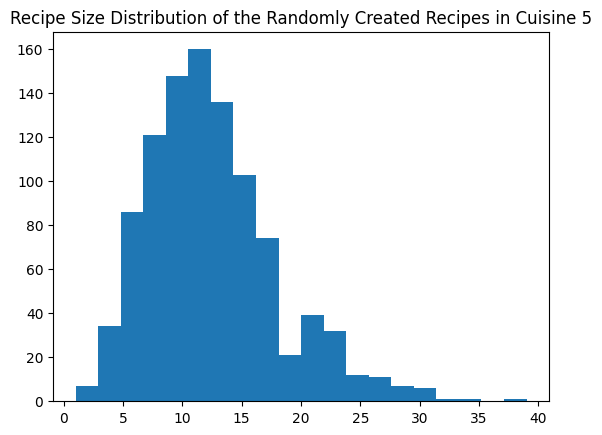

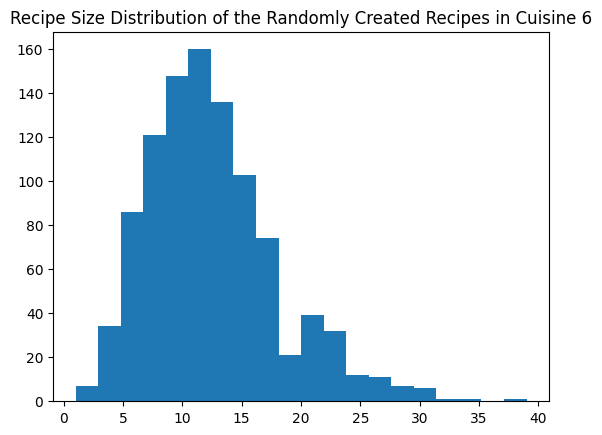

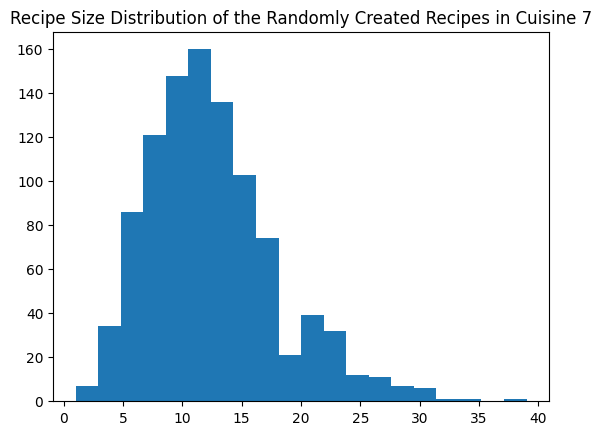

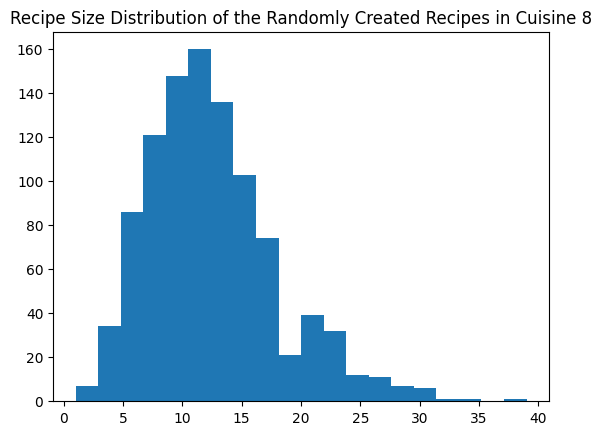

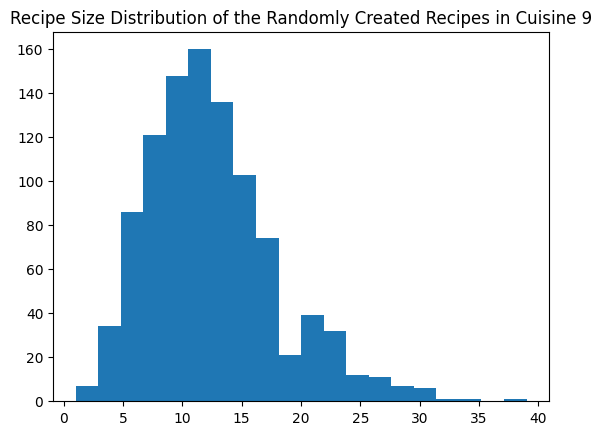

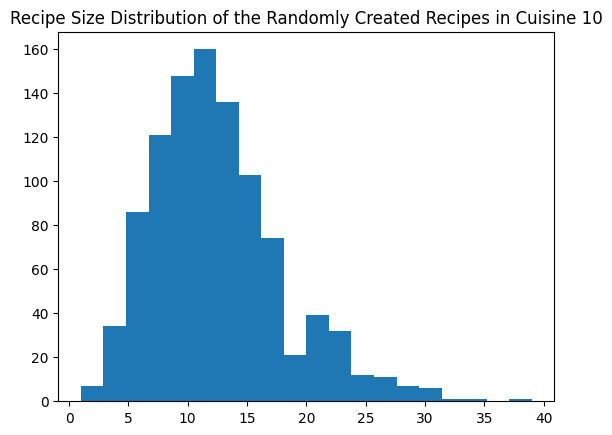

In [54]:
#Plot the recipe size distribution of the original cuisine and the randomly created recipes in 10 sets.

import matplotlib.pyplot as plt

#put headings in the plot
plt.title('Recipe Size Distribution of the Original Cuisine')
recipe_size = []
for i in range(0, len(df_cuisine_ini)):
    recipe_size.append(len(df_cuisine_ini['recipe_Ingredients'][i].split(',')))
                       
plt.hist(recipe_size, bins=20)
plt.show()

#put headings in the plot
for i in range(0, 10):
    recipe_size = []
    for j in range(0, len(size_controlled_ingre_freq_controlled_df[i])):
        recipe_size.append(len(size_controlled_ingre_freq_controlled_df[i]['ingredients'][j]))
    plt.title('Recipe Size Distribution of the Randomly Created Recipes in Cuisine '+str(i+1))
    plt.hist(recipe_size, bins=20)

    plt.show()

#make plots for all the randomly created cuisines in a single plot



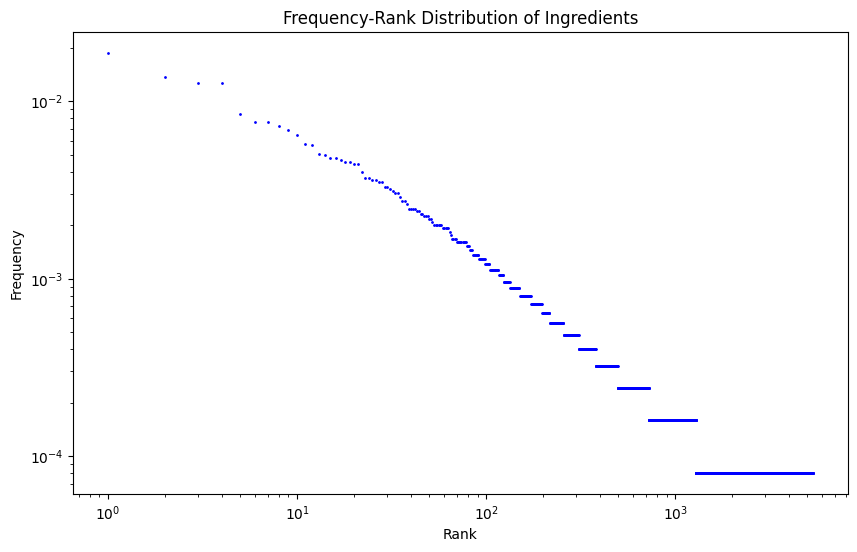

In [55]:
#Plot frequency-rank distribution of the original cuisine & the random recipes.


# Step 5: Sort the DataFrame by ingredient count in descending order
df_ingredient_counts = df_ingredient_counts.sort_values(by='Count', ascending=False)

# Step 6: Add a new column for the rank of each ingredient
df_ingredient_counts['Rank'] = np.arange(1, len(df_ingredient_counts) + 1)

# Step 7: Add a new column for the frequency 
df_ingredient_counts['Frequency'] = df_ingredient_counts['Count'] / total_count

# Step 8: Plot the frequency-rank distribution
plt.figure(figsize=(10, 6))
plt.title('Frequency-Rank Distribution of Ingredients')
plt.scatter(df_ingredient_counts['Rank'], df_ingredient_counts['Frequency'], color='blue', s=1)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [ ]:
def list_ingredient(df):
    ingredient_list = []
    for ingredients in df['recipe_Ingredients']:
        ingredient_list.extend(ingredients.split(','))
    return ingredient_list

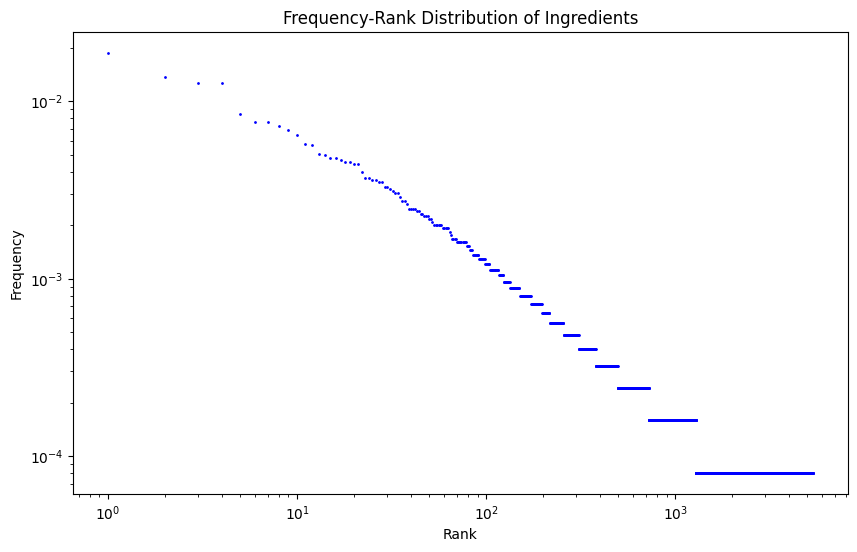

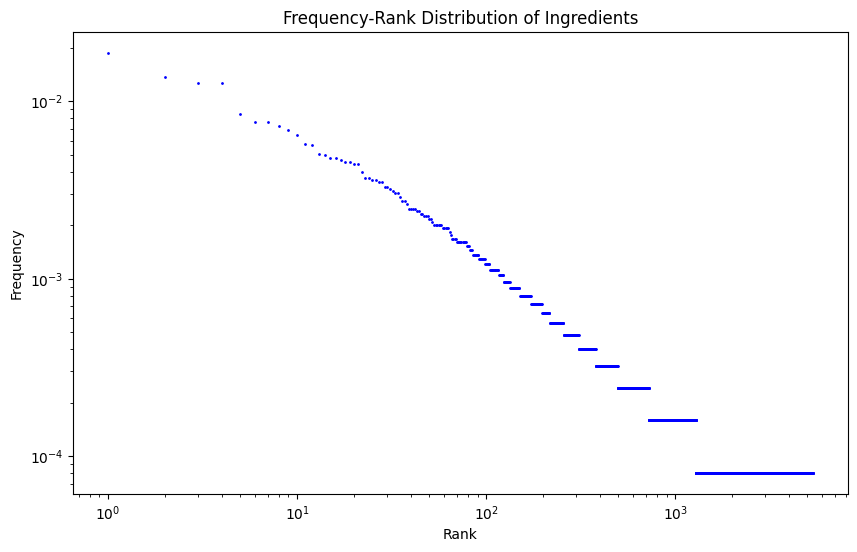

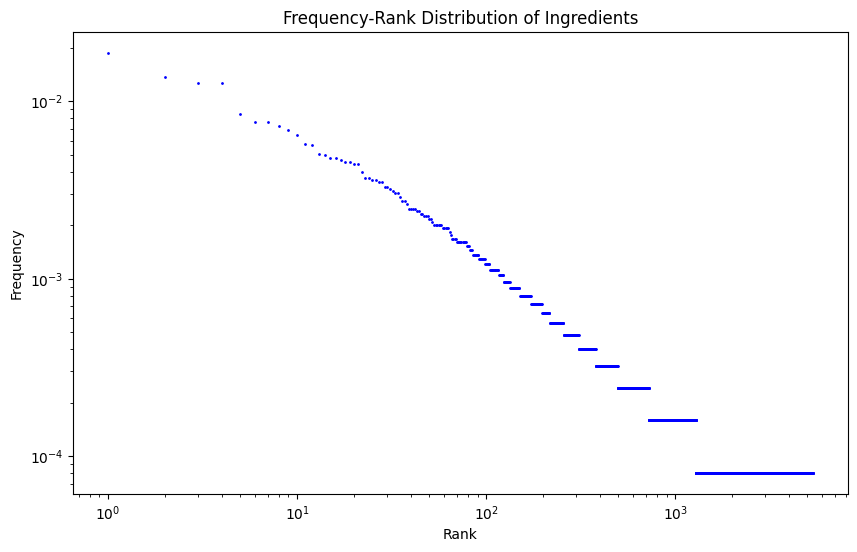

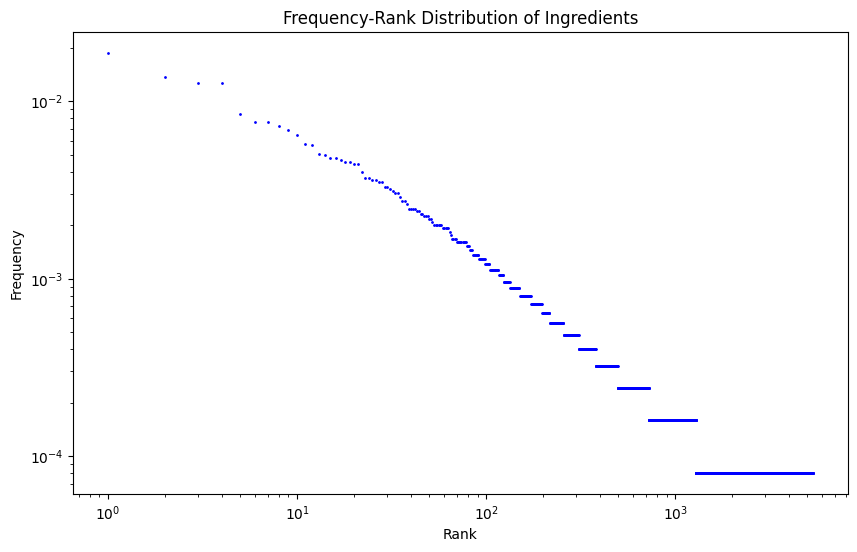

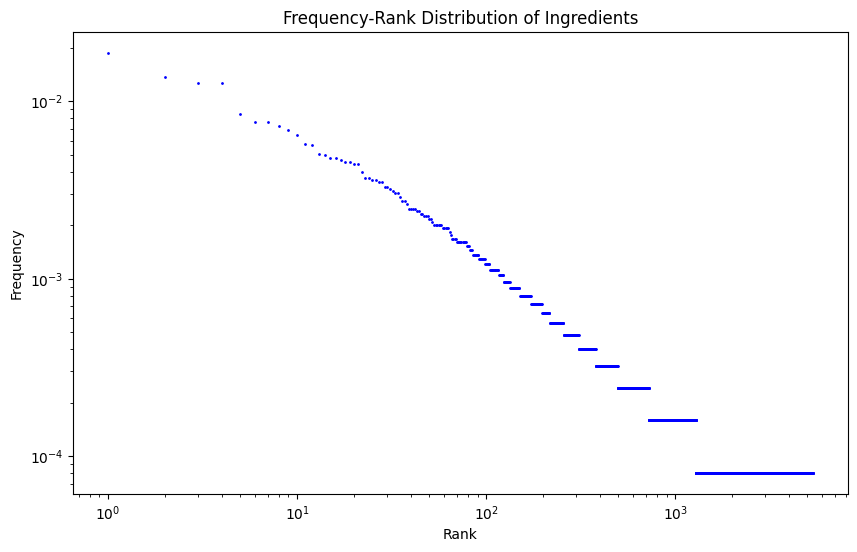

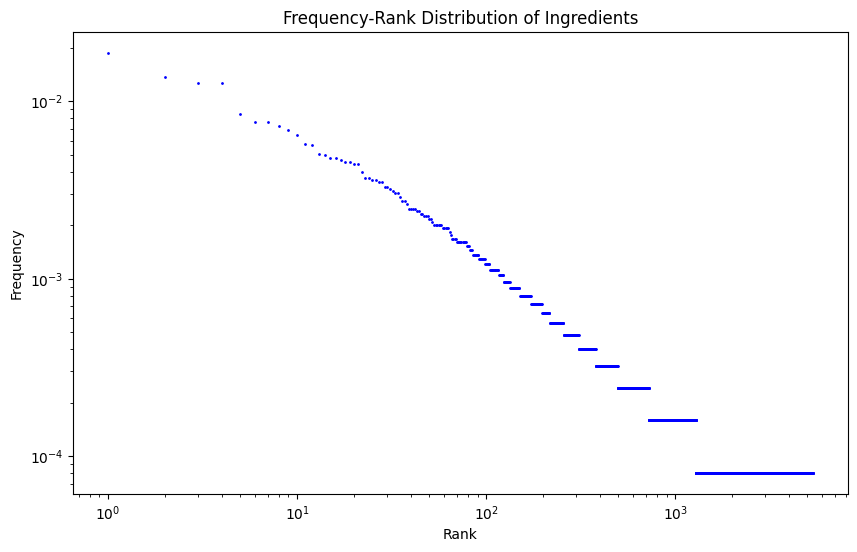

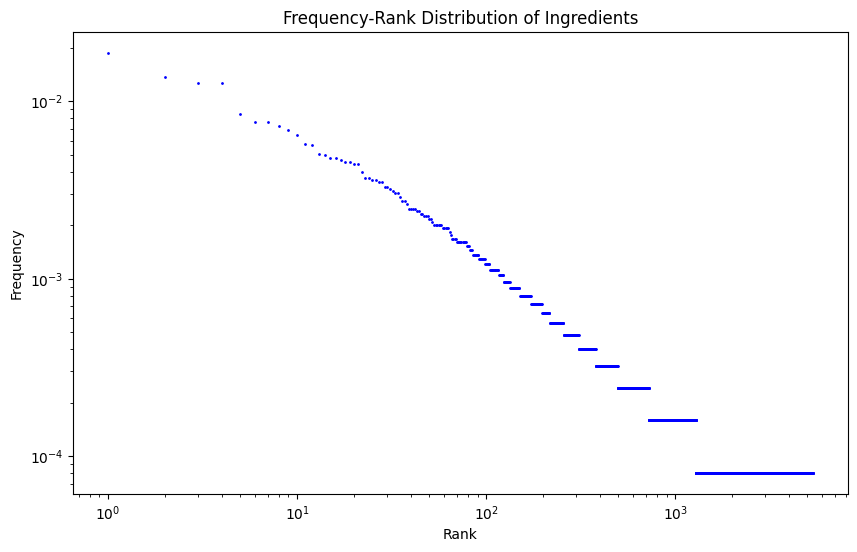

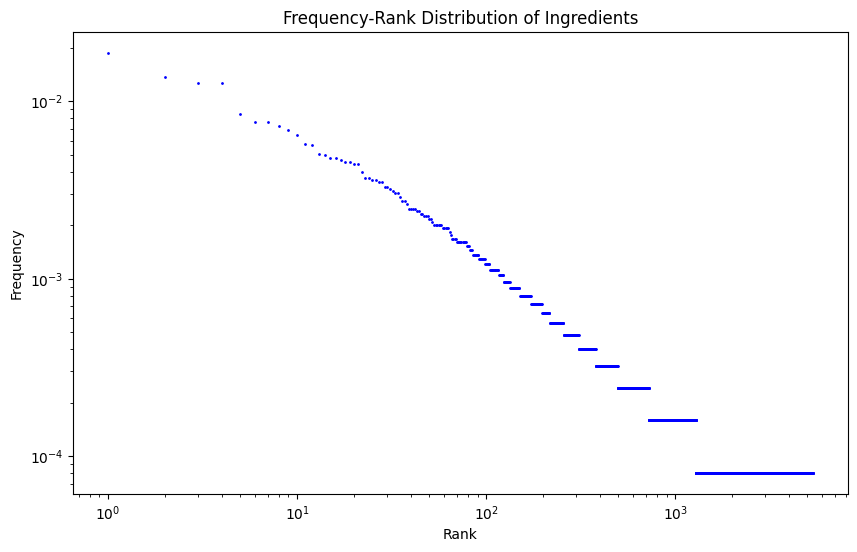

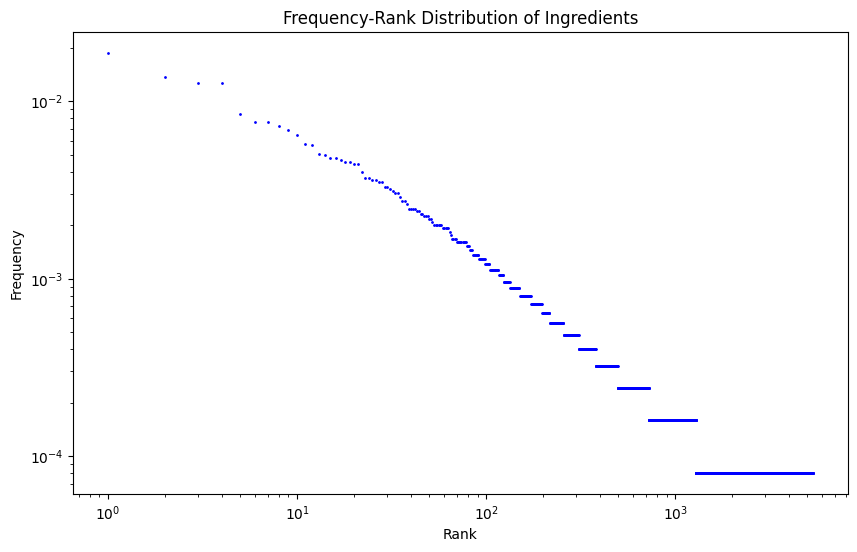

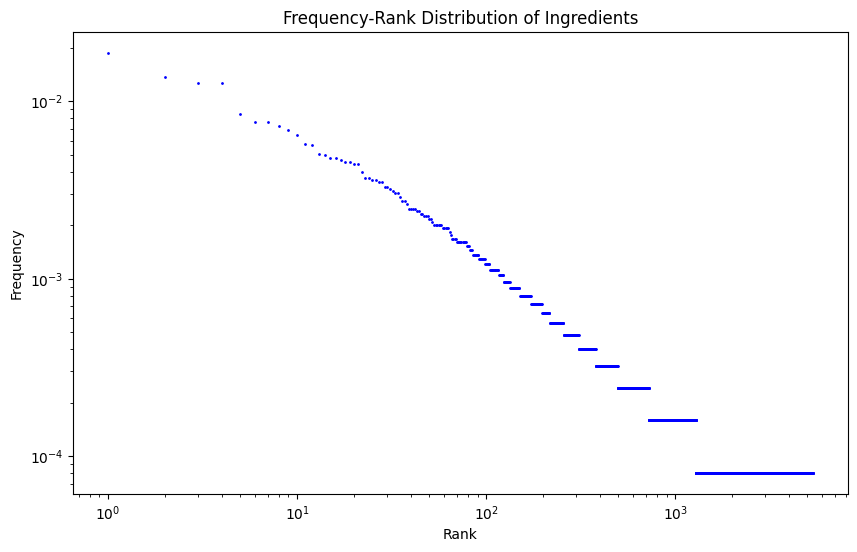

In [56]:
#do the same for all the randomly created cuisines in a single plot

# Step 5: Sort the DataFrame by ingredient count in descending order
for i in range(0, 10):
    df_ingredient_counts_random_cuisine = 